## Привет! 👋 Это ноутбук для новичков про самое известное задание на Kaggle по датасету Titanic ❤️🔥

### В этом ноутбуке вы найдете:

* ✅ Простые шаги с подсказками
* ✅ Визуализацию данных 📊
* ✅ Советы по предобработке 🧹
* ✅ Готовый код для отправки! 💻

### Особенности:
* Разбор датасета Titanic 🚢
* Этот ноутук для Новичков и для всех тех, кто впервые видит Python, ML и Kaggle 🐍
* Комментарии 💡

In [33]:
# ❤️ Шаг 1: Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score  # Добавили импорт

print("Библиотеки загружены! ✅")
plt.style.use('ggplot')



Библиотеки загружены! ✅


In [34]:
# 📂 Шаг 2: Загружаем данные
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [35]:
print("\nДанные загружены! 🎉")
print("➡️ Пример данных:")
display(train_data.head(3))


Данные загружены! 🎉
➡️ Пример данных:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [36]:
# 🔍 Шаг 3: Анализируем данные (EDA)
print("\n🔎 Информация о данных:")
train_data.info()


🔎 Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128107 (\N{MAN AND WOMAN HOLDING HANDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


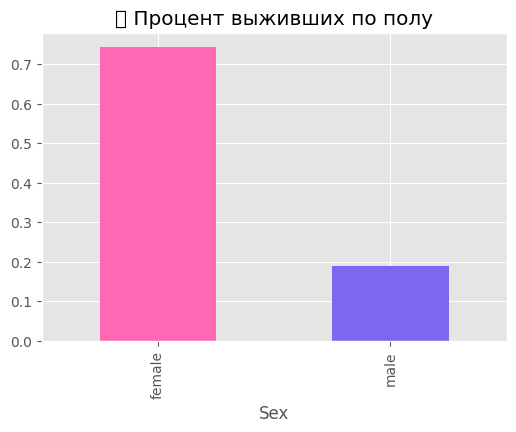

In [37]:
# 📊 Визуализация: Выживаемость по полу
plt.figure(figsize=(6, 4))
train_data.groupby('Sex')['Survived'].mean().plot(
    kind='bar', 
    color=['#FF69B4', '#7B68EE']
)
plt.title('👫 Процент выживших по полу')
plt.show()

In [40]:
 #🧹 Шаг 4: Предобработка данных
def preprocess_data(df):
    # Копируем данные чтобы избежать предупреждений
    df = df.copy()
    
    # Заполнение пропусков
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    
    # Преобразование категориальных признаков
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # One-Hot Encoding для Embarked
    df['Embarked'] = df['Embarked'].fillna('S')
    df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')
    
    # Удаление ненужных столбцов
    cols_to_drop = ['Cabin', 'Ticket', 'Name', 'PassengerId']
    df = df.drop([col for col in cols_to_drop if col in df.columns], axis=1)
    
    return df

In [41]:
# Обрабатываем данные
train_clean = preprocess_data(train_data)
test_clean = preprocess_data(test_data)

In [42]:
print("\n✅ Данные после очистки:")
display(train_clean.head(2))


✅ Данные после очистки:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,1,38.0,1,0,71.2833,True,False,False


In [43]:
# 🔧 Шаг 5: Подготовка данных для модели
X_train = train_clean.drop('Survived', axis=1)
y_train = train_clean['Survived']
X_test = test_clean

In [44]:
# Проверяем совпадение колонок
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0  # Добавляем отсутствующие колонки

X_test = X_test[X_train.columns]  # Сохраняем порядок колонок


In [45]:
# 🧠 Шаг 6: Обучение модели
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    random_state=42
)


In [46]:
# Кросс-валидация
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"\n✅ Средняя точность на кросс-валидации: {cv_scores.mean():.2f}")


✅ Средняя точность на кросс-валидации: 0.82


In [47]:

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


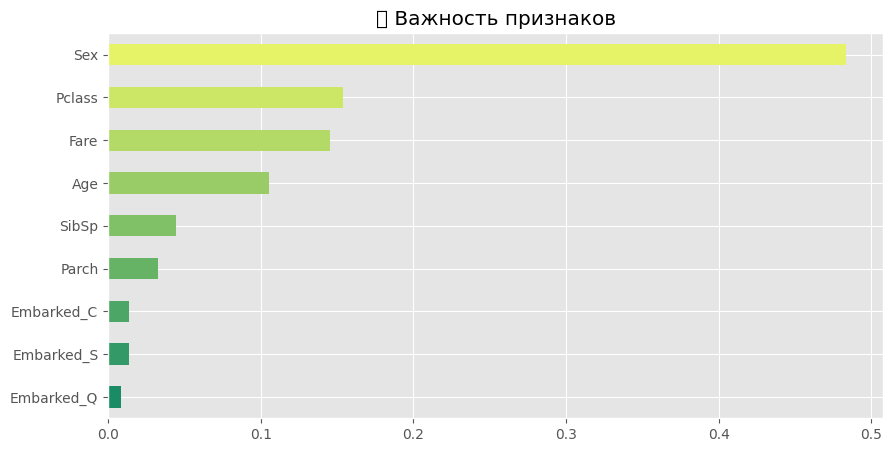

In [48]:
# 📊 Визуализация важности признаков
plt.figure(figsize=(10,5))
pd.Series(model.feature_importances_, index=X_train.columns).sort_values().plot(
    kind='barh', 
    color=sns.color_palette('summer', len(X_train.columns))
)
plt.title('🔝 Важность признаков')
plt.show()

In [49]:

# 📤 Шаг 7: Генерация предсказаний
predictions = model.predict(X_test)

output = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions
})
output.to_csv('submission.csv', index=False)


In [50]:
print("\n✅ Файл submission.csv готов! Проверьте:")
print(output.head())


✅ Файл submission.csv готов! Проверьте:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


In [51]:
print("\n🔔 Советы для улучшения результата:")
print("1. Добавьте новые признаки (например, FamilySize = SibSp + Parch)")
print("2. Поэкспериментируйте с пороговыми значениями для Age и Fare")
print("3. Попробуйте другие модели (XGBoost, Gradient Boosting)")
print("4. Используйте GridSearchCV для настройки гиперпараметров")


🔔 Советы для улучшения результата:
1. Добавьте новые признаки (например, FamilySize = SibSp + Parch)
2. Поэкспериментируйте с пороговыми значениями для Age и Fare
3. Попробуйте другие модели (XGBoost, Gradient Boosting)
4. Используйте GridSearchCV для настройки гиперпараметров
